In [1]:
import os
import sys 
os.chdir(os.path.join(os.getenv('HOME'), 'RPOSE'))
sys.path.insert(0, os.getcwd())
sys.path.append(os.path.join(os.getcwd() + '/src'))
sys.path.append(os.path.join(os.getcwd() + '/core'))
sys.path.append(os.path.join(os.getcwd() + '/segmentation'))

import pickle
import numpy as np 

# p = "/home/jonfrey/RPOSE/notebooks/Mode.MUTIPLE_INIT_POSES_data_final.pkl" # experiment with predicted flow and valid
p = "/home/jonfrey/RPOSE/notebooks/Mode.MUTIPLE_INIT_POSES_gt_valid_data_final.pkl"

# more noise
p = "/home/jonfrey/RPOSE/notebooks/Mode.MUTIPLE_INIT_POSES_gt_valid_more_noise_trained_data_final.pkl"

p = "/media/scratch1/jonfrey/results/rpose/training_flow_dry_run/2021-07-02T10:40:27_no_synthetic_data/Mode.MUTIPLE_INIT_POSES_eval_data_final.pkl"
with open(p, 'rb') as f:
     data = pickle.load(f)
        
print( data.keys() )
for k in data.keys():
    try:
        data[k] = data[k][:,0]
    except:
        pass
import pandas as pd
df = pd.DataFrame.from_dict( data ) 
df

dict_keys(['add_s', 'adds', 'idx_arr', 'ratios_arr', 'valid_corrospondences', 'init_adds_arr', 'init_add_s_arr', 'epe'])


,add_s,adds,idx_arr,ratios_arr,valid_corrospondences,init_adds_arr,init_add_s_arr,epe
0,0.008078,0.005182,1.0,-1.050354,73960.0,0.005934,0.010887,5.313324
1,0.078766,0.069570,17.0,-1.035593,41490.0,0.024033,0.033880,62.950005
2,0.063574,0.052715,17.0,-1.028848,51931.0,0.003862,0.015588,60.614048
3,0.102763,0.102763,18.0,-3.748734,58639.0,0.028983,0.028983,141.395187
4,0.022069,0.010306,1.0,-3.469588,57529.0,0.023126,0.061373,12.018510
...,...,...,...,...,...,...,...,...
14020,0.109549,0.109549,18.0,-0.904840,54314.0,0.046806,0.046806,113.830254
14021,0.137115,0.095758,2.0,-1.778635,78694.0,0.029820,0.057413,36.097851
14022,0.028476,0.010565,1.0,-2.895868,53052.0,0.020731,0.056536,9.101046
14023,0.172051,0.106646,8.0,-0.154233,18851.0,0.033529,0.097914,137.447098


In [2]:
with open('/home/jonfrey/PoseCNN-PyTorch/data_posecnn.pickle', 'rb') as handle:
    posecnn = pickle.load(handle)
data_posecnn = {}
data_posecnn['add_s'] = np.array( [d['distances_non'] for d in posecnn])
data_posecnn['adds'] = np.array( [d['distances_sys'] for d in posecnn])
data_posecnn['idx_arr'] = np.array( [d['cls_index']-1 for d in posecnn])
df_posecnn = pd.DataFrame.from_dict( data_posecnn ) 
df_posecnn 

,add_s,adds,idx_arr
0,0.010331,0.006101,0
1,0.015830,0.005267,5
2,0.082734,0.047821,13
3,0.127282,0.081377,18
4,0.058098,0.032544,19
...,...,...,...
14020,0.014305,0.007267,3
14021,0.021800,0.012786,5
14022,0.010457,0.004589,8
14023,0.050037,0.017271,14


In [50]:
add_s = df["add_s"].to_numpy()
epe = df["epe"].to_numpy()

m = (add_s < 0.05) * (epe < 50)
epe = epe[m]
add_s = add_s[m]


In [25]:
epe

array([], dtype=float64)

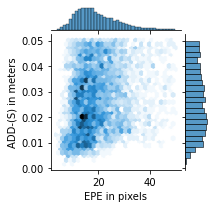

In [76]:
import seaborn as sns

# KDE 2D density plot
df_plot = pd.DataFrame.from_dict( {'EPE in pixels':epe ,'ADD-(S) in meters':add_s} ) 

ax = sns.jointplot(data = df_plot, x='EPE in pixels', y='ADD-(S) in meters', kind = 'hex',height =4) # color = 'royalblue',  kind='kde'
# ax.fig.suptitle('ADD-(S) vs EPE', fontsize=12) #, verticalalignment='bottom');
ax.fig.savefig("/home/jonfrey/RPOSE/docs/add(-s)_vs_epe.png", dpi = 600)



In [64]:
from pose_estimation import compute_auc
sym = [20,19,18,15,12]

def auc( k,obj,df):
    return round( compute_auc( df[k][df['idx_arr']==obj].to_numpy() ),2)
def bold(a,b):
    if a > b:
        return f'\033[1m {a} \033[0m vs {b}'#  + str(a) +'\033[0m' + ' vs ' + str(b)
    return f' {a} vs \033[1m {b} \033[0m'


for obj in range(0,21):
    s = ""
    if obj in sym:
        s+= '\033[1m'
    s+= f'ADDS-AUC {obj}: '
    if obj in sym:
        s+= '\033[0m'

    a,b =  auc('adds',obj,df), auc('adds',obj,df_posecnn)
    s+= bold(a,b)
    if 'init_adds_arr' in df.keys():
        s+= f"   init: {auc('init_adds_arr',obj,df)}"
    print(s)
    
print("")
print("")
print("")


for obj in range(0,21):
    s = ""
    if obj in sym:
        s+= '\033[1m'
    s+= f'ADD-(S) AUC {obj}: '
    if obj in sym:
        s+= '\033[0m'
    
    a,b =  auc('add_s',obj,df), auc('add_s',obj,df_posecnn)
    s+= bold(a,b)
    if 'init_add_s_arr' in df.keys():
        s+= f"   init: {auc('init_add_s_arr',obj,df)}"
    print(s)

ADDS-AUC 0:  78.22 vs  87.84    init: 87.85
ADDS-AUC 1:  60.45 vs  80.48    init: 80.87
ADDS-AUC 2:  62.93 vs  74.1    init: 73.21
ADDS-AUC 3:  73.23 vs  83.94    init: 84.0
ADDS-AUC 4:  80.0 vs  90.09    init: 89.74
ADDS-AUC 5:  52.47 vs  87.52    init: 87.33
ADDS-AUC 6:  31.1 vs  70.02    init: 66.6
ADDS-AUC 7:  61.97 vs  88.59    init: 85.74
ADDS-AUC 8:  72.11 vs  85.97    init: 86.34
ADDS-AUC 9:  42.7 vs  87.0    init: 86.56
ADDS-AUC 10:  80.76 vs  86.21    init: 86.34
ADDS-AUC 11:  51.52 vs  65.36    init: 66.17
ADDS-AUC 12:  41.01 vs  73.06    init: 72.28
ADDS-AUC 13:  46.46 vs  76.28    init: 76.63
ADDS-AUC 14:  66.67 vs  74.83    init: 74.4
ADDS-AUC 15:  7.18 vs  25.29    init: 25.59
ADDS-AUC 16:  52.2 vs  62.96    init: 63.74
ADDS-AUC 17:  48.68 vs  71.95    init: 72.0
ADDS-AUC 18:  2.83 vs  41.26    init: 37.4
ADDS-AUC 19:  13.68 vs  30.48    init: 26.16
ADDS-AUC 20:  18.84 vs  85.09    init: 86.29



ADD-(S) AUC 0:  61.53 vs  61.56    init: 61.56
ADD-(S) AUC 1:  60.93 vs  61